In [2]:
# Keras, dataset, and VGG19 imports
import keras
from keras.datasets import cifar10
from keras.applications import VGG19

ImportError: cannot import name 'VGG19' from 'keras.applications' (/home/niccolo/anaconda3/envs/EEE515project/lib/python3.9/site-packages/keras/applications/__init__.py)

In [3]:
# Loading VGG19 with imagenet weights
from keras.layers import Input

vgg19_model = VGG19(include_top = True, weights='imagenet')
vgg19_model.summary()

2021-11-27 11:21:44.103887: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-27 11:21:44.104864: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-27 11:21:44.153819: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: TITAN X (Pascal) computeCapability: 6.1
coreClock: 1.531GHz coreCount: 28 deviceMemorySize: 11.88GiB deviceMemoryBandwidth: 447.48GiB/s
2021-11-27 11:21:44.153856: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-27 11:21:44.155551: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-11-27 11:21:44.155591: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2021

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# define new empty model
model = Sequential()

# add all layers except output from VGG19 to new model
for layer in vgg19_model.layers[:-1]:
  model.add(layer)
  
# freeze all weights
for layer in model.layers:
  layer.trainable = False
  
# add dropout layer and new output layer
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [5]:
# load dataset
(x_train, y_train) , (x_val, y_val) = cifar10.load_data()

In [7]:
import numpy as np
import cv2

In [8]:
import matplotlib.pyplot as plt

NUM_CLASSES = 10

# Onehot encode labels

y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val, NUM_CLASSES)

In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [11]:
# returns batch_size random samples from either training set or validation set
# resizes each image to (224, 244, 3), the native input size for VGG19
def getBatch(batch_size, train_or_val='train'):
  x_batch = []
  y_batch = []
  if train_or_val == 'train':
    idx = np.random.randint(0, len(x_train), (batch_size))

    for i in idx:
      img = cv2.resize(x_train[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_train[i])
  elif train_or_val == 'val':
    idx = np.random.randint(0, len(x_val), (batch_size))

    for i in idx:
      img = cv2.resize(x_val[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_val[i]) 
  else:
    print("error, please specify train or val")
   
  x_batch = np.array(x_batch)
  y_batch = np.array(y_batch)
  return x_batch, y_batch
    

In [12]:
EPOCHS = 20
BATCH_SIZE = 250
VAL_SIZE = 500
STEPS = 50


for e in range(EPOCHS):
  train_loss = 0
  train_acc = 0
  
  for s in range(STEPS):
    x_batch, y_batch = getBatch(BATCH_SIZE, "train")
    out = model.train_on_batch(x_batch, y_batch)
    train_loss += out[0]
    train_acc += out[1]
  
  print(f"Epoch: {e}\nTraining Loss = {train_loss / STEPS}\tTraining Acc = {train_acc / STEPS}")
  
  x_v, y_v = getBatch(VAL_SIZE, "val")
  eval = model.evaluate(x_v, y_v)
  print(f"Validation loss: {eval[0]}\tValidation Acc: {eval[1]}\n")
  
  


2021-11-27 11:22:31.710492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-27 11:22:31.731647: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3591690000 Hz
2021-11-27 11:22:31.801309: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-11-27 11:22:31.898170: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-11-27 11:22:32.402608: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-11-27 11:22:32.446331: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


Epoch: 0
Training Loss = 1.6326077497005462	Training Acc = 0.5483999933302403
16/16 [==============================] - 13s 476ms/step - loss: 0.7696 - categorical_accuracy: 0.7460
Validation loss: 0.7696120738983154	Validation Acc: 0.7459999918937683

Epoch: 1
Training Loss = 1.0094348299503326	Training Acc = 0.6951733362674714
16/16 [==============================] - 1s 74ms/step - loss: 0.6953 - categorical_accuracy: 0.7680
Validation loss: 0.6953302621841431	Validation Acc: 0.7680000066757202

Epoch: 2
Training Loss = 0.8807277393341064	Training Acc = 0.7226133286952973
16/16 [==============================] - 1s 77ms/step - loss: 0.7722 - categorical_accuracy: 0.7500
Validation loss: 0.7722328901290894	Validation Acc: 0.75

Epoch: 3
Training Loss = 0.8076206409931183	Training Acc = 0.7435466647148132
16/16 [==============================] - 1s 76ms/step - loss: 0.6826 - categorical_accuracy: 0.7740
Validation loss: 0.6826145052909851	Validation Acc: 0.7739999890327454

Epoch: 4
Tra

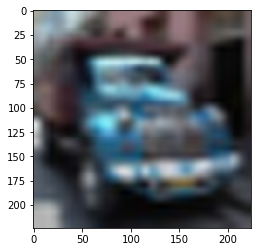

pred: truck
acct: truck


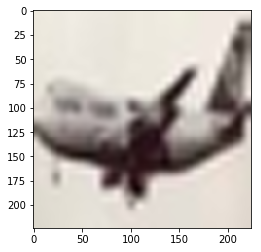

pred: airplane
acct: airplane


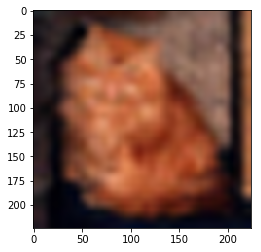

pred: cat
acct: cat


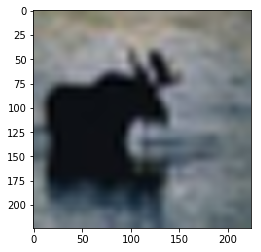

pred: deer
acct: deer


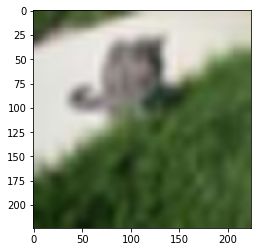

pred: deer
acct: cat


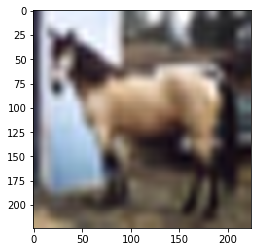

pred: horse
acct: horse


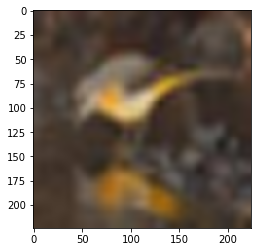

pred: bird
acct: bird


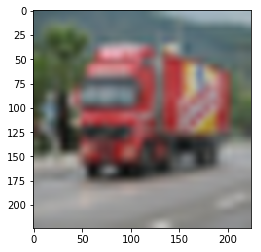

pred: truck
acct: truck


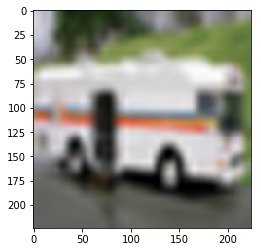

pred: automobile
acct: truck


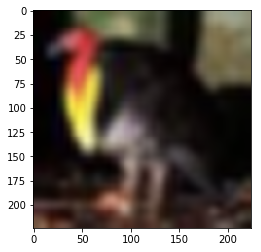

pred: bird
acct: bird


In [81]:
# Sample outputs from validation set
CATEGORIES = "airplane automobile bird cat deer dog frog horse ship truck".split(" ")

import matplotlib.pyplot as plt

x_v, y_v = getBatch(10, "val")

for i in range(10):

  import numpy as np
  plt.imshow(x_v[i])
  plt.show()
  print("pred: " +  CATEGORIES[np.argmax(model.predict(x_v[i:i+1]))])
  print("acct: " + CATEGORIES[np.argmax(y_v[i])])


 
